### Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('E:\\prasad\\practice\\My Working Projects\\Completed\\NLP\\Text Classification-Spam & Ham')

### Perform Imports and Load Data

In [3]:
df=pd.read_csv('SMSSpamCollection.csv',sep='\t',header=None,names=['labels','messages'])
df.head(2)

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [4]:
df.isnull().sum()

labels      0
messages    0
dtype: int64

In [5]:
df.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Visualize the data:

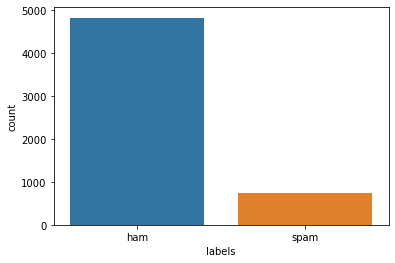

In [7]:
sns.countplot(df.labels)
plt.show()

In [8]:
df.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [9]:
X=df['messages']
X.head(2)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
Name: messages, dtype: object

In [10]:
y=df['labels']
y.head(2)

0    ham
1    ham
Name: labels, dtype: object

### Data Split into Train,Test

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3900,), (1672,), (3900,), (1672,))

### Featuer Extraction of NLP

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

### Model Building

In [13]:
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [14]:
y_pred=text_clf.predict(X_test)

In [15]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

### Model Evaluation

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [17]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1446,    2],
       [  46,  178]], dtype=int64)

<AxesSubplot:>

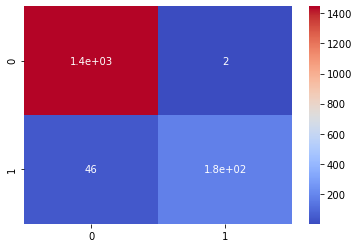

In [18]:
sns.heatmap(cm,annot=True,cmap='coolwarm',)

In [19]:
accuracy_score(y_test,y_pred)

0.9712918660287081

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1448
        spam       0.99      0.79      0.88       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [21]:
emails = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.",
         "SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info",
         "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
         "Oh k...i'm watching here:)",
         "England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ãº1.20 POBOXox36504W45WQ 16+",
         "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"]

In [22]:
text_clf.predict(emails)

array(['ham', 'spam', 'ham', 'ham', 'ham', 'spam'], dtype=object)

In [23]:
import pickle,joblib

### Save Model in Pickle & Joblib

In [26]:
pickle.dump(text_clf,open('spam_ham_pickle','wb'))

In [31]:
joblib.dump(text_clf,'spam_ham_joblib')

['spam_ham_joblib']

### Load Pickle Model

In [27]:
model_pkl=pickle.load(open('spam_ham_pickle','rb'))

In [28]:
y_pred=model_pkl.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.9712918660287081

In [30]:
confusion_matrix(y_test,y_pred)

array([[1446,    2],
       [  46,  178]], dtype=int64)

### Load Joblib Model

In [32]:
model_jbl=joblib.load('spam_ham_joblib')

In [33]:
y_pred_jbl=model_jbl.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred_jbl)

0.9712918660287081

In [35]:
confusion_matrix(y_test,y_pred)

array([[1446,    2],
       [  46,  178]], dtype=int64)